In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from pylab import rcParams

#path = '/kaggle'
path = '/tmp/working'
input_path = path + '/input/gearbox-fault-diagnosis-stdev-of-accelerations/'
broken_dataset  = "b30hz_stdev_100.csv"
healthy_dataset = "h30hz_stdev_100.csv"

import os
print('Current path: ' + os.getcwd())

# Nex snippet would list all folders under path
#for root, dirs, files in os.walk(path, topdown=False):
#   for name in dirs:
#      print("FOLDER: " + os.path.join(root, name)) 

# Nex snippet would list all files with their paths
#for dirname, _, filenames in os.walk('.'): # os.walk('/tmp/working')
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


Current path: /tmp/working


# Exploring the dataset

In [30]:
healthyDataset = pd.read_csv(input_path + healthy_dataset)
healthyDataset.describe()

,a1,a2,a3,a4,load,failure
count,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.0
mean,7.064944,4.238840,3.987288,4.343511,45.809533,0.0
std,2.231626,1.326401,1.069945,1.247653,28.315587,0.0
min,1.802930,1.272738,1.022471,1.222780,0.000000,0.0
25%,5.496722,3.337468,3.226538,3.453185,20.000000,0.0
50%,6.856787,4.016475,3.916282,4.275365,50.000000,0.0
75%,8.419728,4.846186,4.689546,5.156541,70.000000,0.0
max,23.909199,10.984053,8.273939,10.609798,90.000000,0.0


In [31]:
brokenDataset = pd.read_csv(input_path + broken_dataset)
brokenDataset.describe()

,a1,a2,a3,a4,load,failure
count,10049.000000,10049.000000,10049.000000,10049.000000,10049.000000,10049.0
mean,4.455177,4.294107,3.706363,4.209203,45.478157,1.0
std,1.202618,0.969298,0.947515,1.205743,29.005078,0.0
min,1.468928,1.341292,0.990336,1.111679,0.000000,1.0
25%,3.595718,3.617281,3.020892,3.358830,20.000000,1.0
50%,4.399122,4.256609,3.646947,4.142668,50.000000,1.0
75%,5.221865,4.949478,4.354815,5.006999,70.000000,1.0
max,10.067158,8.071265,7.425122,10.022236,90.000000,1.0


## Join healthy & broken datasets in a single dataframe

In [32]:
dataset = pd.concat([healthyDataset, brokenDataset], axis=0)
dataset.describe()

,a1,a2,a3,a4,load,failure
count,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000,20203.000000
mean,5.766842,4.266330,3.847555,4.276706,45.644706,0.497401
std,2.219236,1.162870,1.020591,1.228792,28.660383,0.500006
min,1.468928,1.272738,0.990336,1.111679,0.000000,0.000000
25%,4.164285,3.473209,3.118392,3.409206,20.000000,0.000000
50%,5.337988,4.146414,3.779156,4.211713,50.000000,0.000000
75%,7.003621,4.903647,4.521386,5.078614,70.000000,1.000000
max,23.909199,10.984053,8.273939,10.609798,90.000000,1.000000


## Rows count per load
Overall, for both healthy & broken

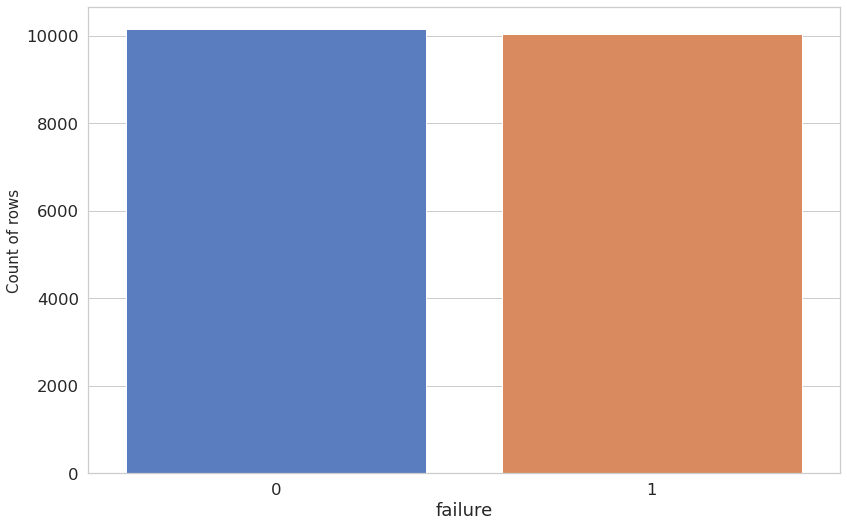

In [33]:
plt.style.use('fivethirtyeight')
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 12, 8

overall = sns.countplot(x='failure',data=dataset)
overall.set_ylabel('Count of rows',fontsize=15)
plt.show()

Text(0, 0.5, 'Count of rows')

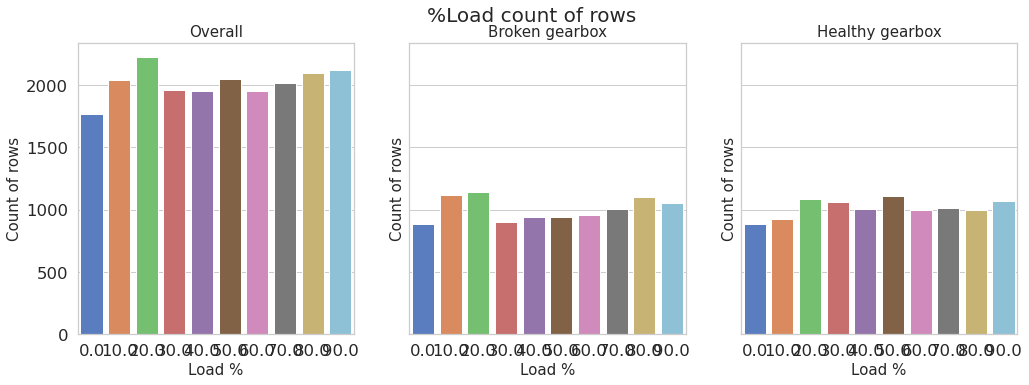

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
   
fig.suptitle('%Load count of rows', fontsize=20)
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

#Overall
overall = sns.countplot(ax=axes[0], x='load',data=dataset)
axes[0].set_title('Overall', fontsize=15)
overall.set_xlabel('Load %',fontsize=15)
overall.set_ylabel('Count of rows',fontsize=15)

# Broken gearbox
broken = sns.countplot(ax=axes[1], x='load',data=brokenDataset)
axes[1].set_title('Broken gearbox', fontsize=15)
broken.set_xlabel('Load %',fontsize=15)
broken.set_ylabel('Count of rows',fontsize=15)

# Healthy gearbox
heathly = sns.countplot(ax=axes[2], x='load',data=healthyDataset)
axes[2].set_title('Healthy gearbox' , fontsize=15)
heathly.set_xlabel('Load %',fontsize=15)
heathly.set_ylabel('Count of rows',fontsize=15)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


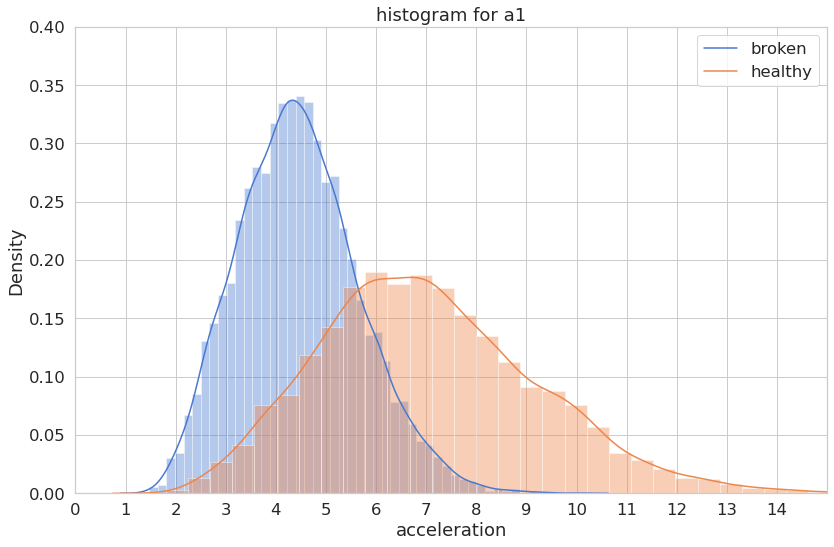

In [54]:
fig, ax = plt.subplots()
sns.distplot(dataset['a1'][dataset.failure == 1], bins=50)
sns.distplot(dataset['a1'][dataset.failure == 0], bins=50)
ax.set(xlim=(0,15),ylim=(0,0.4))
ax.set_xticks( range(0,15) )
ax.set_xlabel('acceleration')
plt.legend(['broken', 'healthy'])
ax.set_title('histogram for ' + str('a1'))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

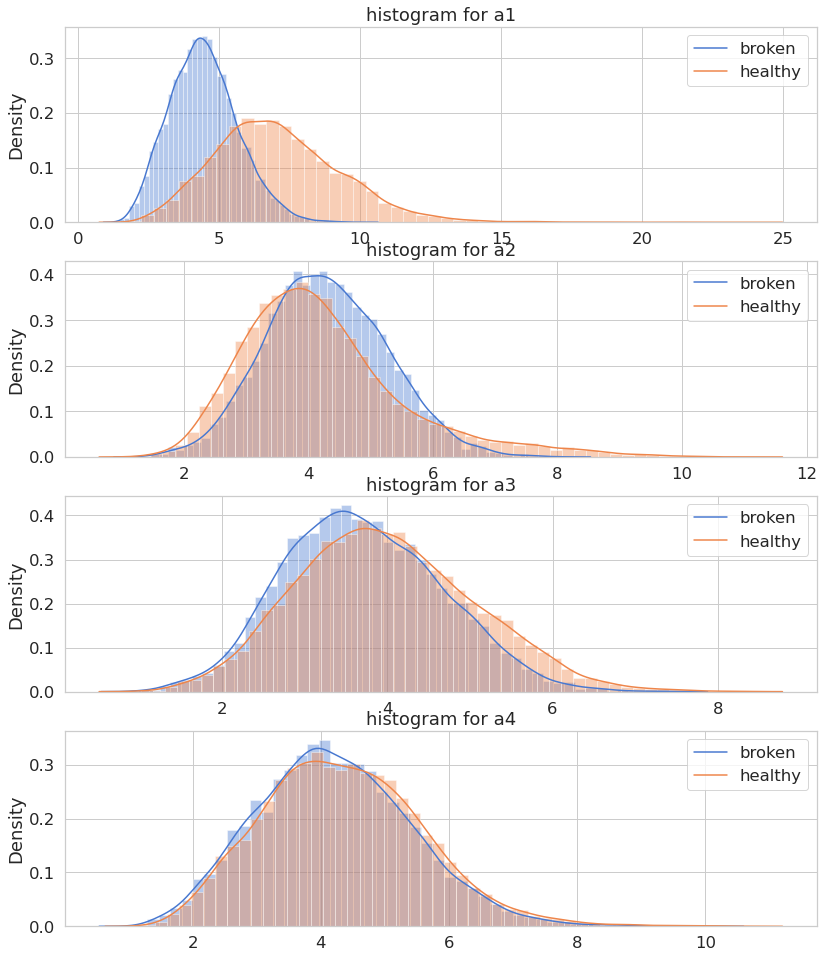

In [10]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.failure == 1], bins=50)
    sns.distplot(dataset[cn][dataset.failure == 0], bins=50)
    ax.set_xticks( range(0,15) )
    ax.set_xlabel('acceleration)
    plt.legend(['broken', 'healthy'])
    ax.set_title('histogram for ' + str(cn))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

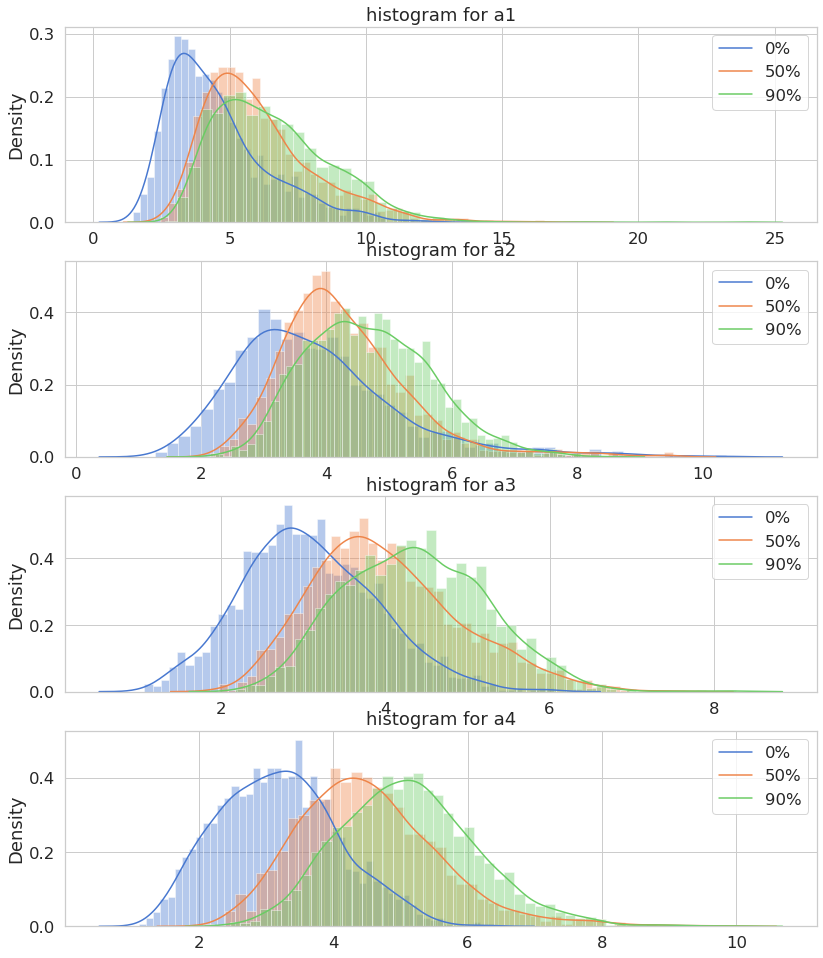

In [11]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(dataset[['a1','a2','a3','a4']]):
    ax = plt.subplot(gs[i])
    sns.distplot(dataset[cn][dataset.load == 0], bins=50)
    sns.distplot(dataset[cn][dataset.load == 50], bins=50)
    sns.distplot(dataset[cn][dataset.load == 90], bins=50)
    ax.set_xlabel('')
    plt.legend(['0%', '50%', '90%'])
    ax.set_title('histogram for ' + str(cn) + ': healthy & broken')
    ax.set_title('histogram for ' + str(cn))
plt.show()

## Correlation matrix

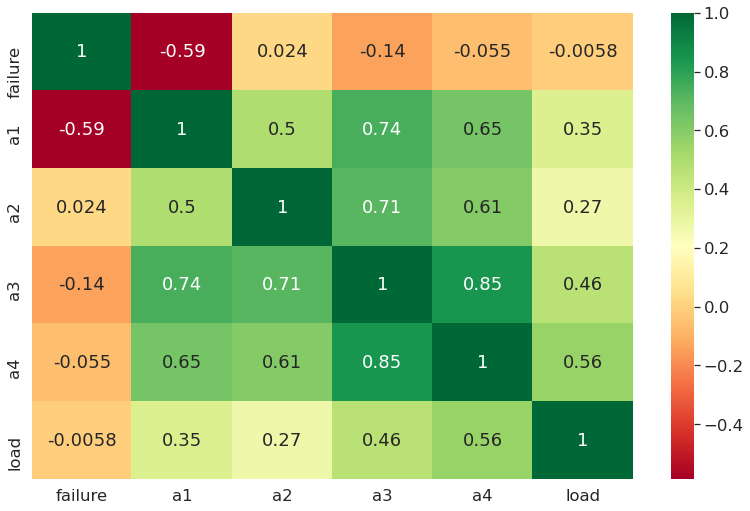

In [12]:
columns = ['failure','a1', 'a2', 'a3', 'a4', 'load']
sns.heatmap(dataset[columns].corr(),annot=True,cmap='RdYlGn')
fig=plt.gcf()
plt.show()

# Logistic regression

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Predictor variable (features)
columns = ['a1', 'a2', 'a3', 'a4', 'load']
X = dataset[columns]
# Target variable: Failure (boolean)
#y = dataset.iloc[:,-1]
y = dataset[['failure']]
y.columns

Index(['failure'], dtype='object')

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
# Import logistic regression classifier
from sklearn.linear_model import LogisticRegression

# Setup the model
logis = LogisticRegression(max_iter=1000)

# Train the model
logis.fit(X_train,y_train)

# Predict Outcome for the test set
y_pred = logis.predict(X_test)
print("Prediction for the test data (first 10 rows):", y_pred[:10])

Prediction for the test data (first 10 rows): [1 0 0 0 1 1 0 1 0 0]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Confusion matrix

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred,y_test)
cm

array([[1851,  194],
       [ 167, 1829]])

In [18]:
# .score returns the mean accuracy on the given test data and labels
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
print( logis.score(X_test,y_test) , logis.score(X_train,y_train) )

0.9106656768126701 0.915542630862517


## Classification report

In [19]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      2018
           1       0.92      0.90      0.91      2023

    accuracy                           0.91      4041
   macro avg       0.91      0.91      0.91      4041
weighted avg       0.91      0.91      0.91      4041



## ROC curve

In [21]:
# For the ROC curve we need not only the predicted class ('Outcome'), but also the scores on what the predictions are based
# * if threshold 0
#  ** predict>0 => Outcome=1
#  ** predict<0 => Outcome=0 
#  - Remember that predictions were calculated with METHOD .predict(X_test)
#  - Now we also have to include METHOD .decision_function(X_test)
y_pred_score = logis.decision_function(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

# If using the test set (X_test, y_test)
fpr,tpr,threshold= roc_curve(y_test, y_pred_score)

In [25]:
# Area Under Curve
lr_auc = auc(fpr, tpr)
print("AUC=", lr_auc)

AUC= 0.972162303970151


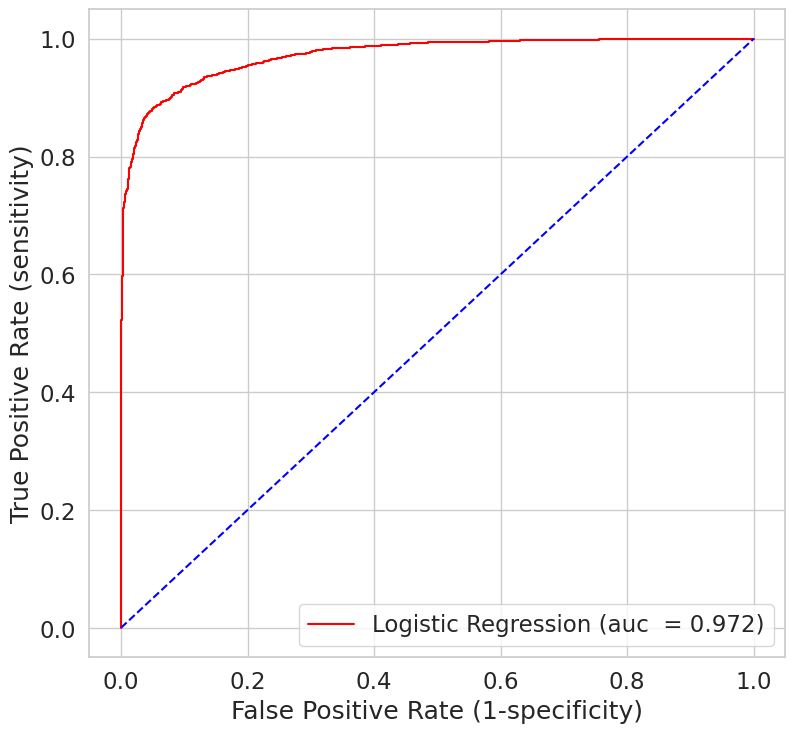

In [27]:
# This default size comes from above
#rcParams['figure.figsize'] = 12, 8

plt.figure(figsize = (8,8), dpi=100)

plt.plot(fpr, tpr, color='red', linestyle='-', label = "Logistic Regression (auc  = %0.3f)"%lr_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')

plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')

plt.legend()

plt.show()